# Movement Report Data Cleaning

Objective:
The objective of this script is to clean and standardize data from Movement Reports and create a consolidated dataset with relevant information while removing duplicates and unnecessary columns.

The raw data had following limitations:
- Complex format that is reader friendly but not for data processing 
- Empty metrics 
- Weird concatenations 
- Merged rows & columns 

Cleaned data will then be used for visualisation to draw trends & analysis, as well as prediction models. 

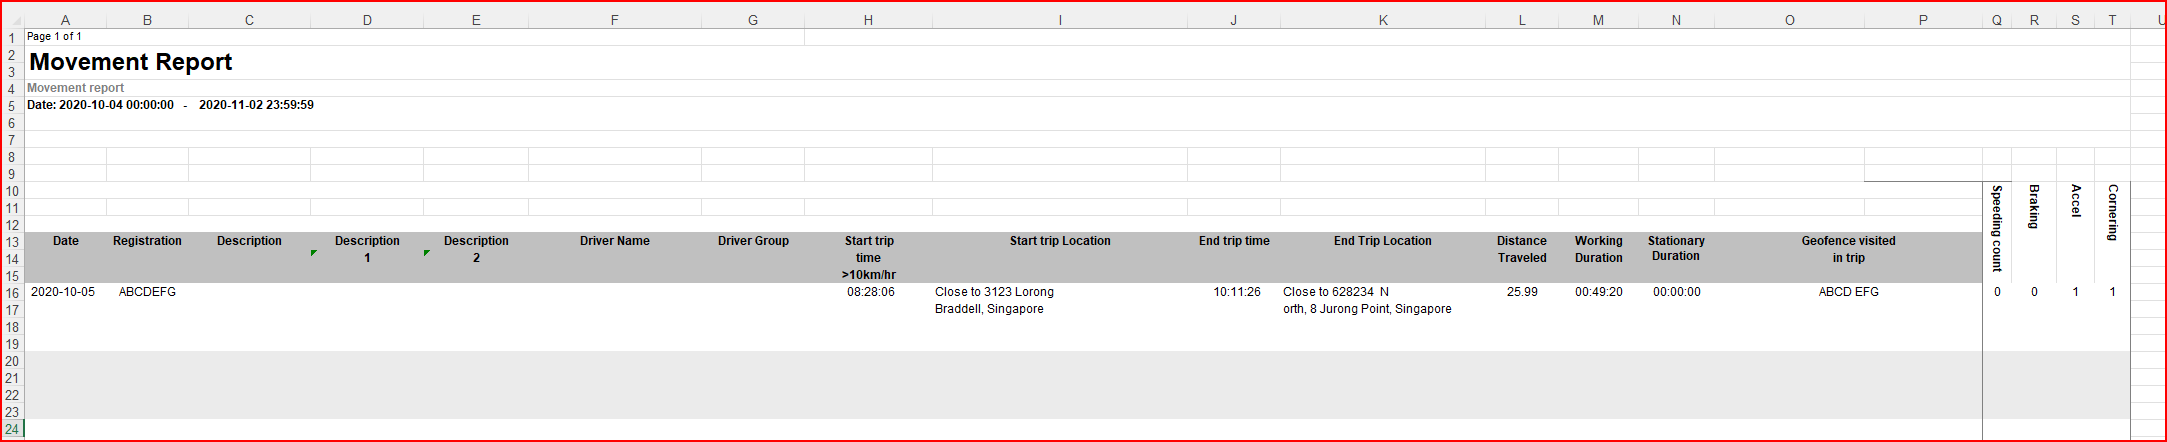

In [8]:
from IPython.display import Image
Image(filename='Movement Report Sample.png')
#Data has been replaced with dummy data

__Import necessary libraries & understand the intial imported format__

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from numpy import nan

#Store as a dataframe & Set options to display full column width
pd.set_option("display.max_colwidth", -1)
df = pd.read_excel("Movement Report 13.xls",skiprows =12,header = [0,1,2])

# Create a copy of the original dataframe
original = df
# Display the first few rows of the dataframe
df.head()

#Check column data types
df.dtypes

__Clean up table headers and standardize letter case conventions__

In [ ]:
# Clean up table headers and standardize to lowercase
ans = []
for title in df.columns:
    name = ""
    for element in title:
        if name == "":
            name += element
        elif "Unnamed" not in element:
            name += " " +element 
    ans.append(name.lower())
df.columns = ans
df.head()

__Rename columns__

In [ ]:
# Rename specific columns
names = df.columns.values
names_list = ["drop","speeding count","braking","accel","cornering"]
for i in range(1,len(names_list)+1):
    word = names_list[-i]
    names[-i] = word
df.columns = names
del df["drop"]
df

__Only select columns we are interested in__

In [ ]:
# Delete columns that are not in the 'useful' list
useful = ["date","registration","start trip time >10km/hr","start trip location","end trip time","end trip location","distance traveled","working duration","geofence visited in trip","speeding count","braking","accel","cornering"]

for title in df.columns: 
    if title not in useful:
        while title in df.columns: #may have duplicated columns that have already been deleted
            del df[title]
    #print(df.columns)
    
# Display the first few rows after cleaning
df.head(5)

In [ ]:
for row in df.iterrows():
    print(row)
    for i in range(0,len(df.colums))

__Delete rows where all columns are NaN__

In [ ]:
# Delete rows where all columns are NaN
row_no = 0 
rows_dropped = []
deleted = []
for row in df.iterrows():
#     print(row)
#     print(row[1])
    count = 0
#     print("entering row now")
    for i in range(0,len(df.columns)):
        if  pd.isnull(row[1][i])== True:
#             print(row[1])
            count+= 1
        if row[1][i] in ("Totals","Registration","time",">10km/hr","Speeding count") :
            rows_dropped.append(row_no)
            deleted.append(row)
            df = df.drop([row_no])
    if count == len(df.columns):
#         print("true")
        rows_dropped.append(row_no)
        deleted.append(row)
        df = df.drop([row_no])
#         print("drop successful")
#     print("end the process -----------------------")
    row_no+=1
# print(rows_dropped) # row number of deleted rows
#deleted >> collection of deleted rows to double chk 

# Reset the index of the dataframe
df.reset_index(drop=True, inplace=True)
df.head()

__Process rows with multiple entries in columns 3 and 5__

In [ ]:
# Process rows with multiple entries in columns 3 and 5
num = 0 
emp = 0 
max = len(df)
while num <= max:
    if num == max: 
#         print(num)
#         print(emp)
        for i in range (emp,0,-1):
            string3 = str(df.loc[num-i][3])
            string5 = str(df.loc[num-i][5])
            if string3 != "nan":
                df.loc[num-emp-1][3] = str(df.loc[num-emp-1][3]) + string3
            if string5 != "nan":
                df.loc[num-emp-1][5] = str(df.loc[num-emp-1][5]) + string5
            df = df.drop([num-i])
        emp = 0
        num+=1
    elif pd.isnull(df.loc[num][0])== True:
#         print(num,1)
        emp+=1
        num+=1
    elif emp > 0:
        for i in range (emp,0,-1):
            string3 = str(df.loc[num-i][3])
            string5 = str(df.loc[num-i][5])
            if string3 != "nan":
                df.loc[num-emp-1][3] = str(df.loc[num-emp-1][3]) + string3
            if string5 != "nan":
                df.loc[num-emp-1][5] = str(df.loc[num-emp-1][5]) + string5
            df = df.drop([num-i])
#         print(num,2)
        emp = 0
        num+=1
    else:
#         print(num,3)
        num +=1 
        
print("the end")

In [ ]:
# Reset the index of the dataframe
df.reset_index(drop=True, inplace=True)
df.head()

In [ ]:
# Append the cleaned dataframe to the 'compilation' dataframe
# compilation = pd.DataFrame()
compilation = compilation.append(df)
print(len(compilation))
compilation

__Check for and remove duplicate rows__

In [ ]:
# Check for and remove duplicate rows
compilation.reset_index(drop=True, inplace=True)
compilation.head()
print(len(compilation))
compilation[compilation.duplicated()]

In [ ]:
compilation = compilation.drop_duplicates(keep='last')
print(len(compilation))

__Save in csv format__

In [ ]:
# Save the cleaned dataframe to a CSV file named 'mov.csv'
compilation.to_csv('mov.csv')